# Extracción de características

## Electromiografía

**Objetivo**: Identificar y remover las fuentes de interferencia en señales de Electromiografía.

La señal electromiografía (EMG) se origina a partir de la actividad eléctrica de los músculos, y su análisis y filtrado son fundamentales para la detección y clasificación precisa de gestos y movimientos musculares.

Las señales EMG poseen características únicas que las hacen ideales para el estudio de la actividad muscular y la detección de patrones de movimiento. Estas señales son adquiridas mediante electrodos colocados sobre la superficie de la piel, y su amplitud varía dependiendo de la fuerza y contracción muscular. El ancho de banda típico de las señales EMG oscila entre 20 Hz y 500 Hz, con las frecuencias más relevantes concentradas en el rango de 20 Hz a 250 Hz. Este rango abarca desde componentes relacionadas con la actividad muscular voluntaria hasta señales provocadas por movimientos rápidos y precisos.

Dentro de los usos frecuentes de las señales EMG, destaca su aplicación en la interfaz cerebro-computadora, la rehabilitación motora, la robótica y los sistemas de control gestual. Al filtrar y procesar adecuadamente estas señales, es posible extraer información significativa sobre los movimientos musculares y detectar patrones de gestos con alta precisión. Esto resulta de gran importancia tanto para la investigación en biomecánica como para el desarrollo de dispositivos biomédicos avanzados y sistemas de interacción hombre-máquina.

Al procesar y analizar estas señales, es posible obtener varios rasgos o características típicas que son de gran utilidad para la detección y clasificación de gestos musculares. Algunos de los rasgos más comunes que se pueden extraer de las señales EMG son los siguientes:

1. **Amplitud de la señal**: La amplitud de la señal EMG está directamente relacionada con la intensidad y fuerza de la contracción muscular. Una mayor amplitud puede indicar una mayor actividad muscular y una contracción más intensa.

2. **Frecuencia dominante**: La señal EMG contiene componentes en diferentes frecuencias. La frecuencia dominante representa la frecuencia en la que se concentra la mayor parte de la energía de la señal, lo que puede estar relacionado con el tipo de movimiento realizado.

3. **Forma de onda**: El patrón y la forma de onda de la señal EMG pueden variar según el tipo de movimiento y el músculo involucrado. Estas características de la forma de onda pueden utilizarse para distinguir diferentes gestos o acciones musculares.

4. **Coherencia intermuscular**: La coherencia entre las señales EMG de diferentes músculos puede ofrecer información sobre la coordinación y sincronización de los músculos durante un gesto específico.

5. **Potencia espectral**: El análisis de la potencia espectral de la señal EMG puede ayudar a identificar las frecuencias más relevantes y características en el espectro de frecuencias.

<center><img src="../figures/EMG_example.jpg"/></center>

## Actividades
1. Analizar el archivo 'EMG.csv'
2. Obtener la FFT de cada uno de los canales disponibles
3. Diseñar un esquema de filtrado apropiado para cada canal, contemplando una compensación de fase
4. Analizar el efecto del esque de filtrado diseñado
5. Exportar las señales resultantes con sus variables de interés

## Información adicional
- La frecuencia de muestreo de la señal es 250 Hz
- Se realizaron 4 movimientos, los cuáles se encuentran indicados mediante la columna tag
- La columna 'time' presenta errores, por lo que se debera presindir de ella o crear su propio vector de tiempo

## Solución

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import scipy.signal      as sg

### 1. Anlizar el archivo 'EMG.csv'

##### Cargar el archivo solicitado

In [2]:
data = pd.read_csv("../signals/EMG.csv")
data.head()

,Unnamed: 0,time,ch1,ch2,ch3,ch4,ch5,ch6,tag
0,0,9405.611312,94096.867188,-101231.273438,148296.609375,-29075.685547,-157189.921875,-74254.882812,1
1,1,9405.615312,94330.437500,-101335.210938,148416.125000,-29466.863281,-158487.031250,-73901.039062,1
2,2,9405.619312,93625.085938,-101437.203125,148330.375000,-29291.179688,-157526.171875,-73570.523438,1
3,3,9405.623312,93115.312500,-101362.835938,148201.281250,-28796.712891,-155731.515625,-73588.203125,1
4,4,9405.627312,93908.734375,-101239.898438,148251.718750,-28976.533203,-156779.578125,-74216.617188,1


##### Extraer la información del archivo

In [3]:
ch1 = data["ch1"]
ch2 = data["ch2"]
ch3 = data["ch3"]
ch4 = data["ch4"]
ch5 = data["ch5"]
ch6 = data["ch6"]
tag = data["tag"]

sr = 250
t = np.linspace(0, len(ch1)/sr, len(ch1))


##### Analizar el contenido de cada variable

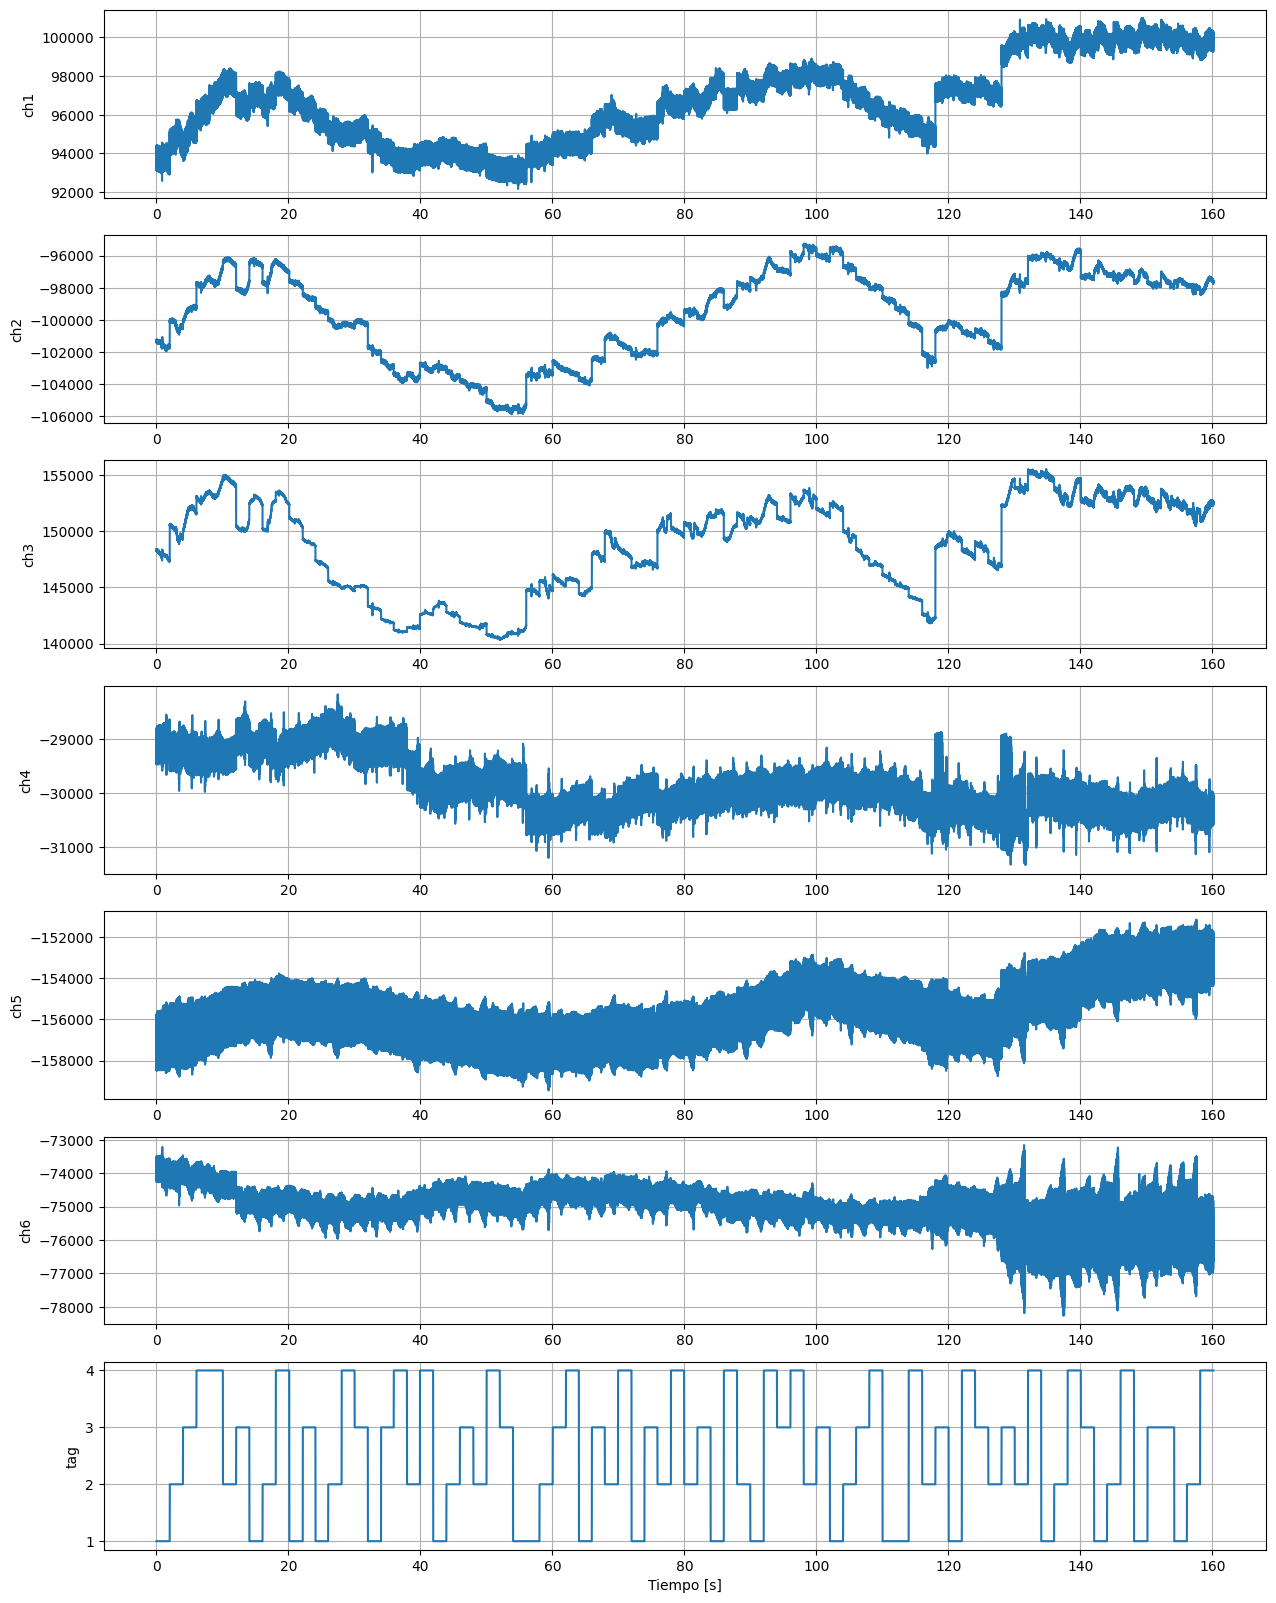

In [4]:
fig, axes = plt.subplots(7, 1, figsize=(15, 20))

for idx, ax in enumerate(axes[:-1]):
    ax.plot(t, data[f"ch{idx+1}"])
    ax.set_ylabel(f"ch{idx+1}")
    ax.grid()

axes[-1].plot(t, data["tag"])
axes[-1].set_ylabel("tag")
axes[-1].set_xlabel("Tiempo [s]")
plt.grid()

plt.show()


### 2. Obtener FFT de cada canal

In [5]:
def fou(senal,sr):
    """
    Función utilizada para calcular la transformada de Fourier de una señal.

    :param np.ndarray senal: Señal a analizar.
    :param int sr: Frecuencia de muestreo de la señal de audio.
    :return np.ndarray h: Espectro de amplitud de la señal.
    :return np.ndarray w: Frecuencias asociadas al espectro de amplitud.
    """
    f = np.fft.fft(senal)
    h = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w = np.linspace(0,sr/2,int(f.shape[0]/2))
    
    return h, w


In [6]:
def plot_fft(senal, sr, title=None):
    h, w = fou(senal, sr)
    plt.figure(figsize=(15, 5))
    plt.plot(w, h)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    if title:
        plt.title(title)
    plt.grid()
    plt.show()

##### Análisis de CH1

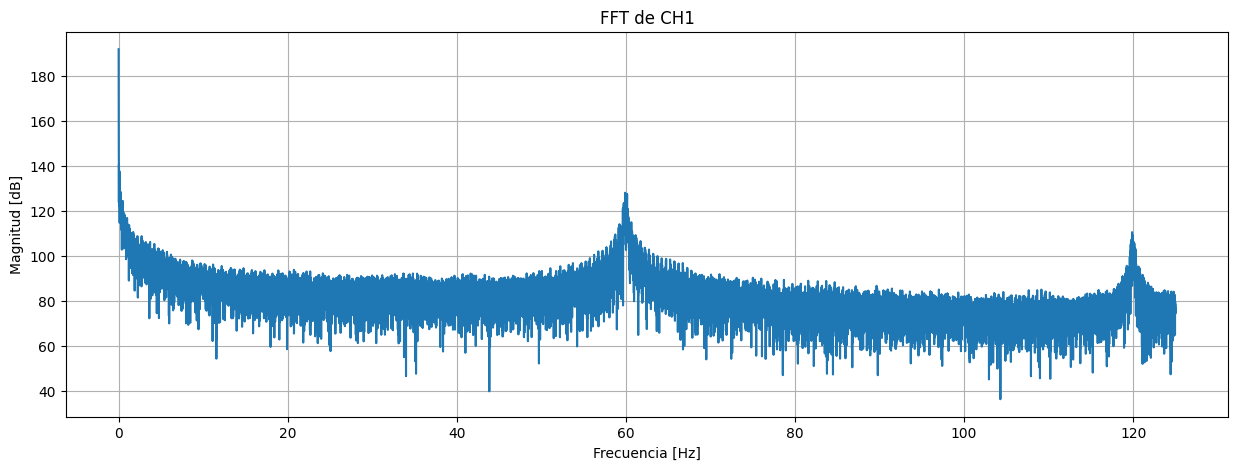

In [7]:
plot_fft(ch1, sr, title="FFT de CH1")

##### Análisis de CH2

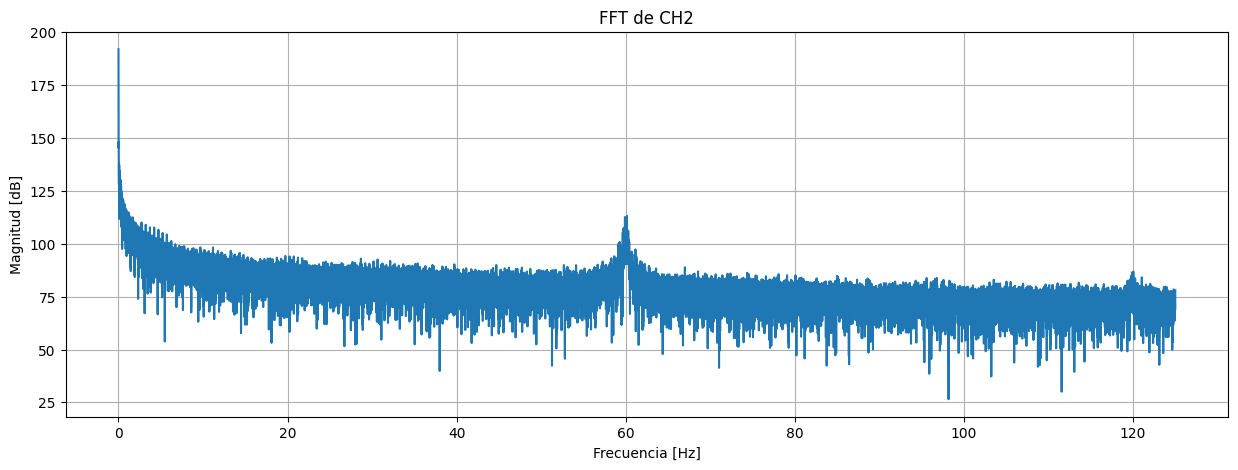

In [8]:
plot_fft(ch2, sr, title="FFT de CH2")

##### Análisis de CH3

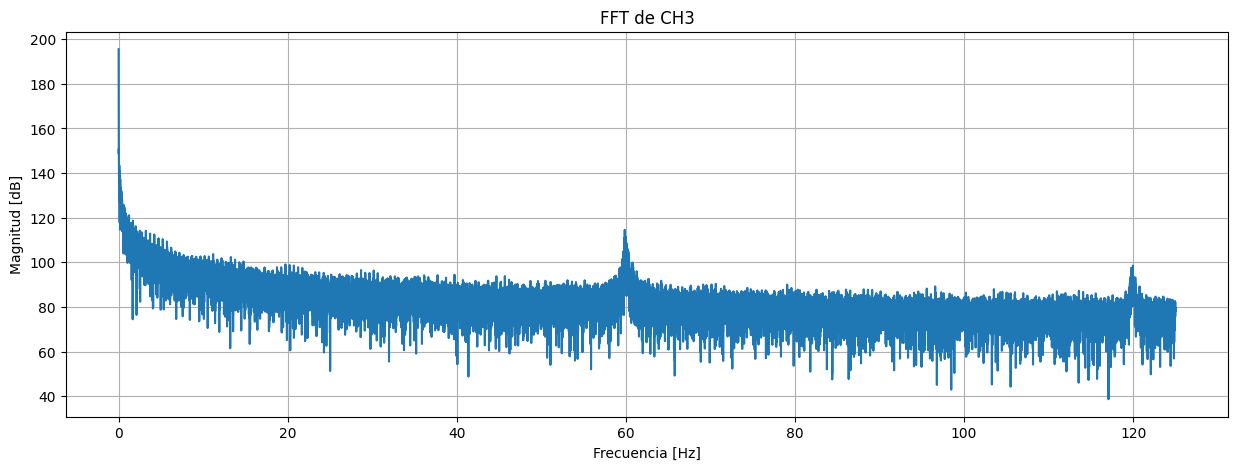

In [9]:
plot_fft(ch3, sr, title="FFT de CH3")

##### Análisis de CH4

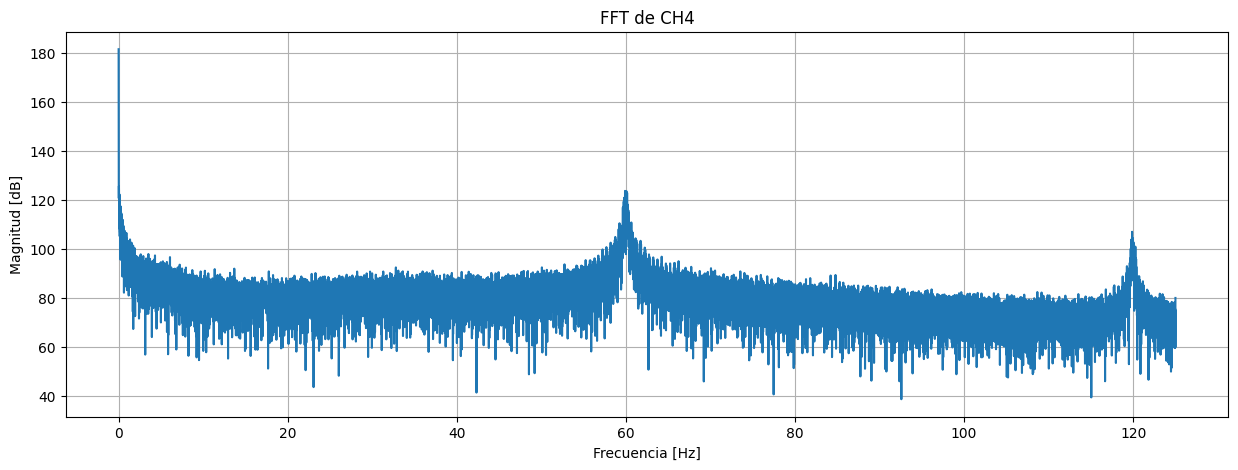

In [10]:
plot_fft(ch4, sr, title="FFT de CH4")

##### Análisis de CH5

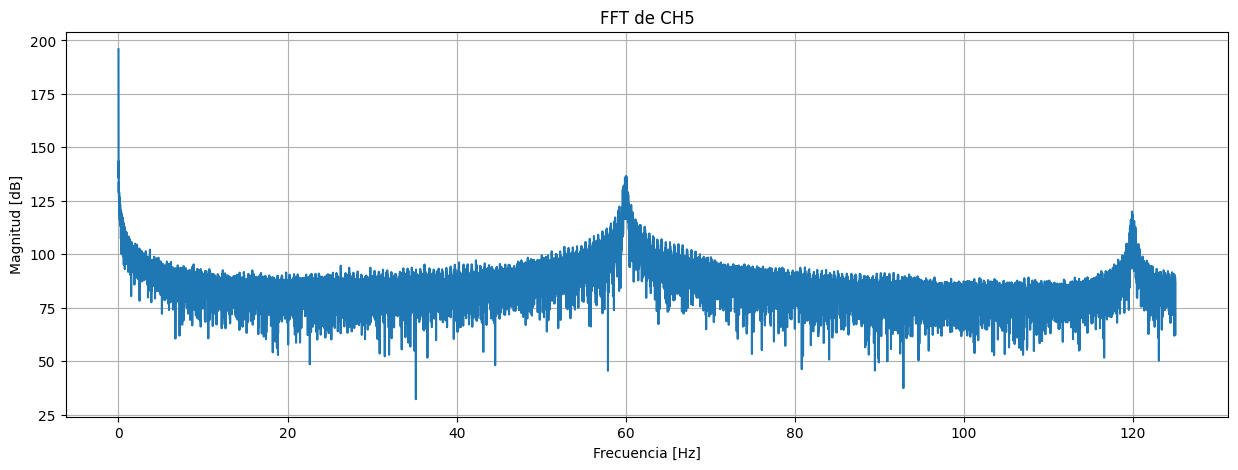

In [11]:
plot_fft(ch5, sr, title="FFT de CH5")

##### Análisis de CH6

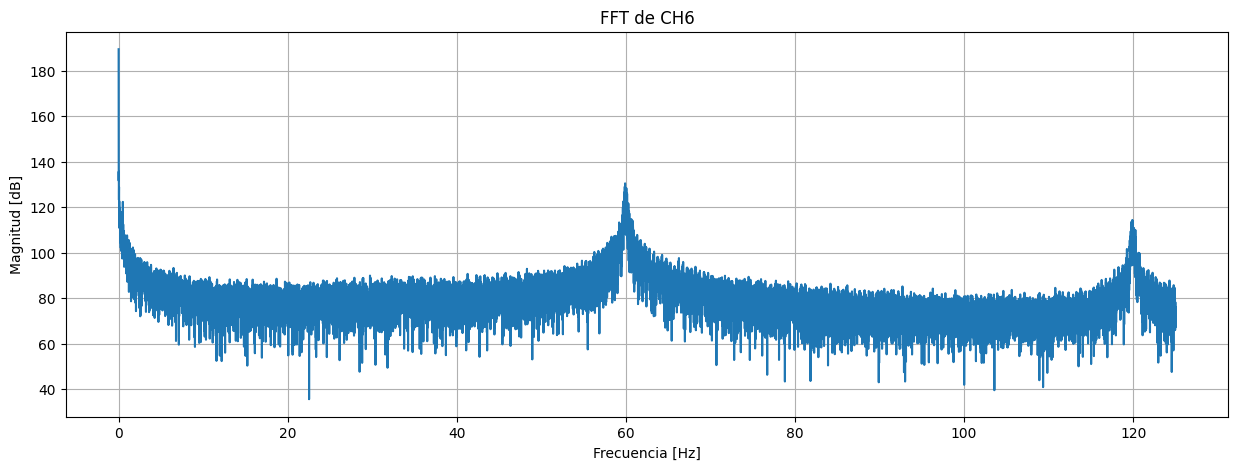

In [12]:
plot_fft(ch6, sr, title="FFT de CH6")

##### Análisis general

En todos los canales se observa una clara interferencia en 60 Hz, así como uno de sus armónicos en 120 Hz.

En todos los canales se observa una interferencia en la línea base, lo que ocasiona que la señal presente un offset.

Se diseñará un esquema de filtrado que contemple un filtro pasa banda en conjunto con un filtro notch para garantizar la remoción de todas las interferencias.

### 3. Diseño del esquema de filtrado

In [13]:
def freqz_plot(b, a, sr):
    """
    Función para obtener la caracterización de filtros digitales.

    :param np.ndarray b: Coeficientes 'b' del diseño del filtro.
    :param np.ndarray a: Coeficientes 'a' del diseño del filtro.
    :para float sr: Frecuencia de muestreo.
    :return np.ndarray w: Frecuencias asociadas a la respuesta en frecuencia.
    :return np.ndarray W: Fase de la respuesta en frecuencia.
    :return np.ndarray H: Magnitud de la respuesta en frecuencia.
    """
    w,h     = sg.freqz(b,a)
    h[h==0] = 1E-5
    H       = 20*np.log10(np.abs(h))
    W       = np.angle(h)
    W       = np.unwrap(W)
    W       = np.degrees(W)
    w       = np.linspace(0,sr/2,H.shape[0])

    return w, W, H

Se diseñaran filtros Butterworth pasa banda y rechaza banda

##### Filtro rechaza banda

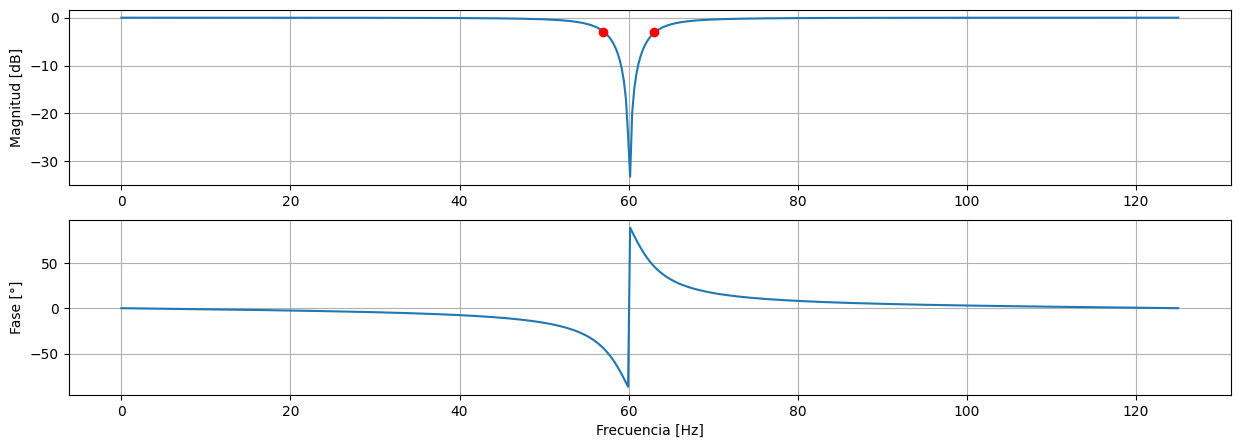

In [14]:
N = 1
Wn = 2*np.array([57., 63.])/sr
b1, a1 = sg.butter(N, Wn, 'bandstop')

w1, W1, H1 = freqz_plot(b1, a1, sr)

plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
plt.plot(w1, H1)
plt.ylabel('Magnitud [dB]')
plt.plot(sr*Wn[0]/2, -3, 'ro')
plt.plot(sr*Wn[1]/2, -3, 'ro')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w1, W1)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.show()

##### Filtro pasa banda

El rango usual para el análisis de EMG está entre los 20 y 250 Hz, sin embargo, en nuestra situación nos encontramos con una señal que fue muestreada a 250 Hz, y por el teorema de Nyquist esto nos indica que la información relevante de está señal se encuentra hasta un máximo de 125 Hz. Considerando que tenemos interferencias de armónicos de 60 Hz, se propone diseñar un filtro pasa banda que abarque las frecuencias de 20 a 100 Hz

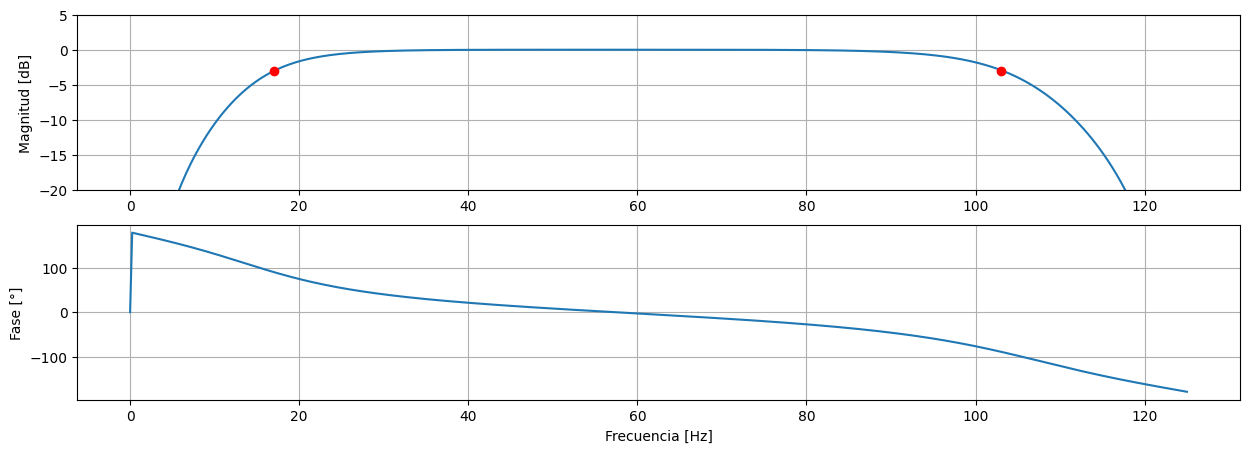

In [15]:
N = 2
Wn = 2*np.array([17., 103.])/sr
b2, a2 = sg.butter(N, Wn, 'bandpass')

w2, W2, H2 = freqz_plot(b2, a2, sr)

plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
plt.plot(w2, H2)
plt.ylabel('Magnitud [dB]')
plt.plot(sr*Wn[0]/2, -3, 'ro')
plt.plot(sr*Wn[1]/2, -3, 'ro')
plt.ylim(-20, 5)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w2, W2)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.show()

##### Diseño de esquema de filtrado

In [16]:
def emg_filter(signal):
    signal_filt = sg.filtfilt(b1, a1, signal)
    signal_filt = sg.filtfilt(b2, a2, signal_filt)
    return signal_filt

### 4. Analizar efecto de filtros

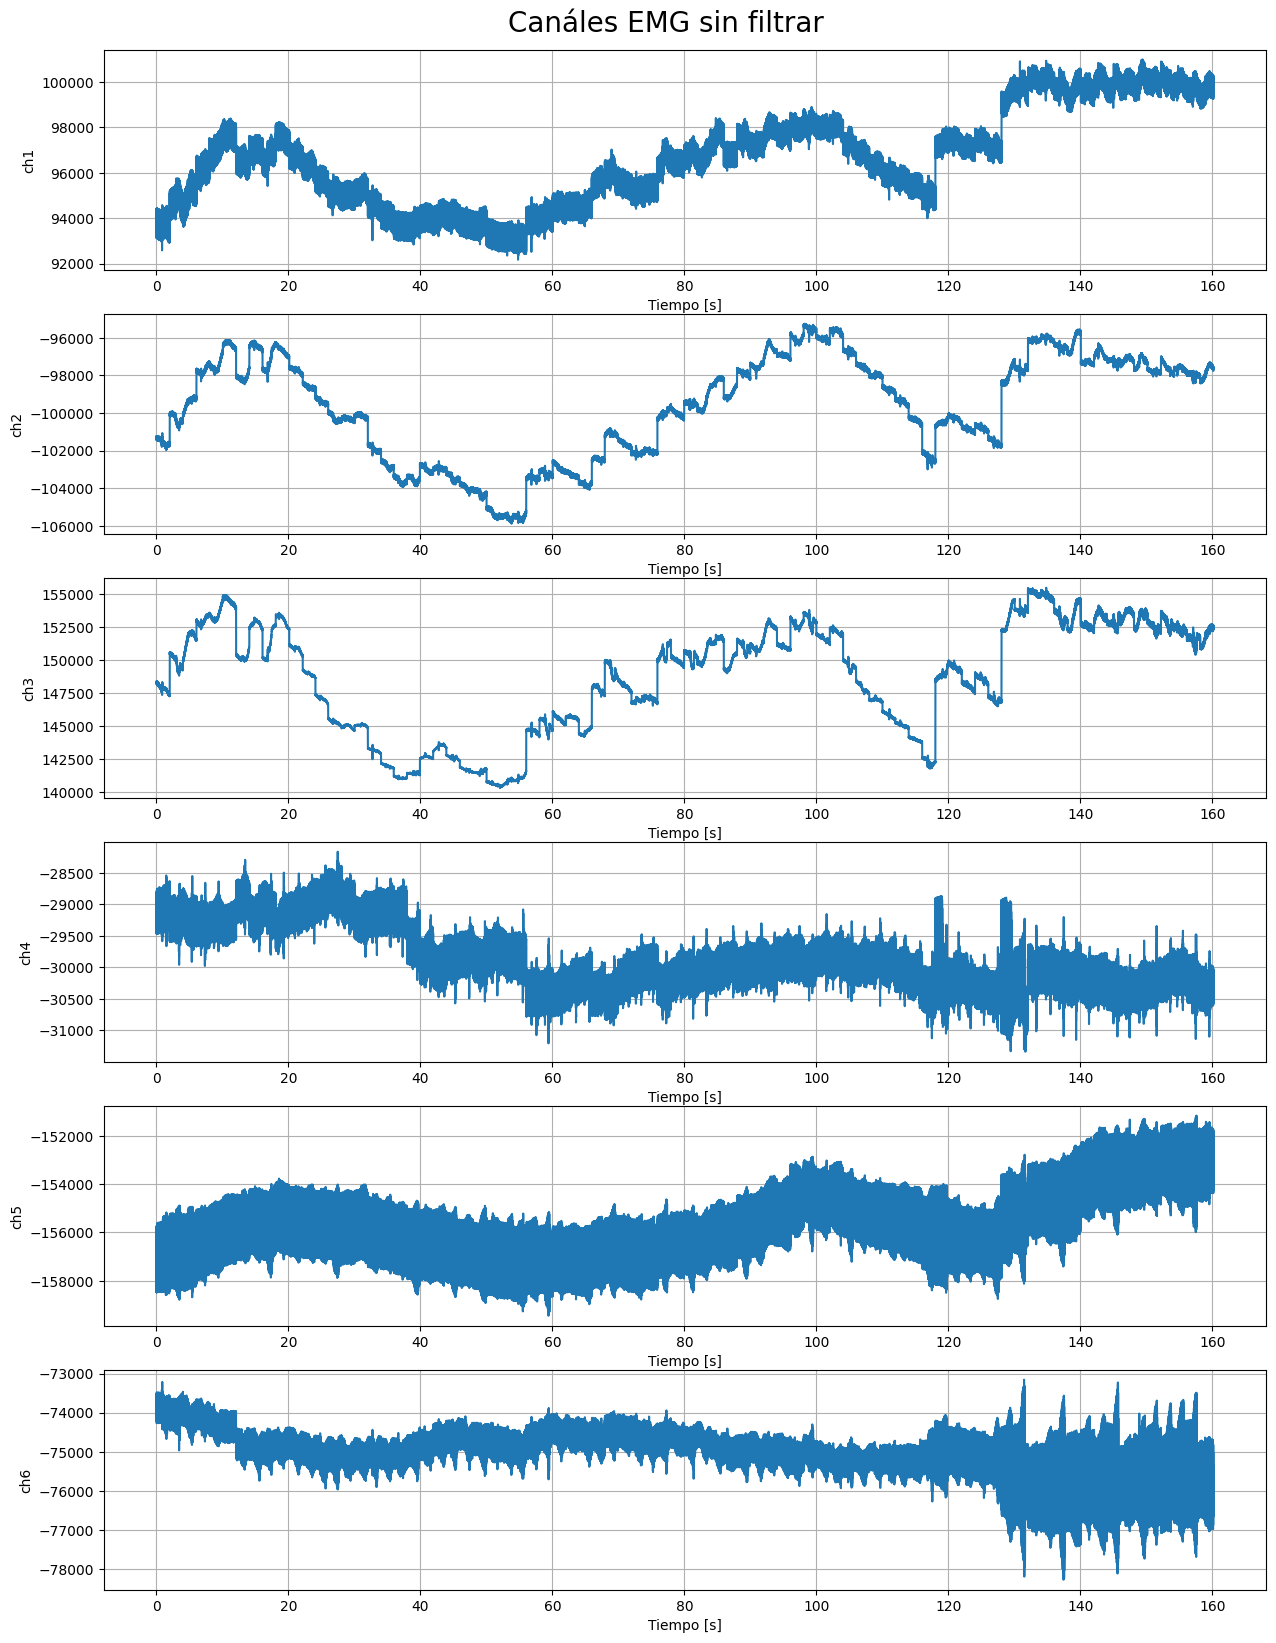

In [17]:
fig, axes = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle("Canáles EMG sin filtrar", y=0.9, fontsize=20)

for idx, ax in enumerate(axes):
    ax.plot(t, data[f"ch{idx+1}"])
    ax.set_ylabel(f"ch{idx+1}")
    ax.set_xlabel("Tiempo [s]")
    ax.grid()

plt.show()

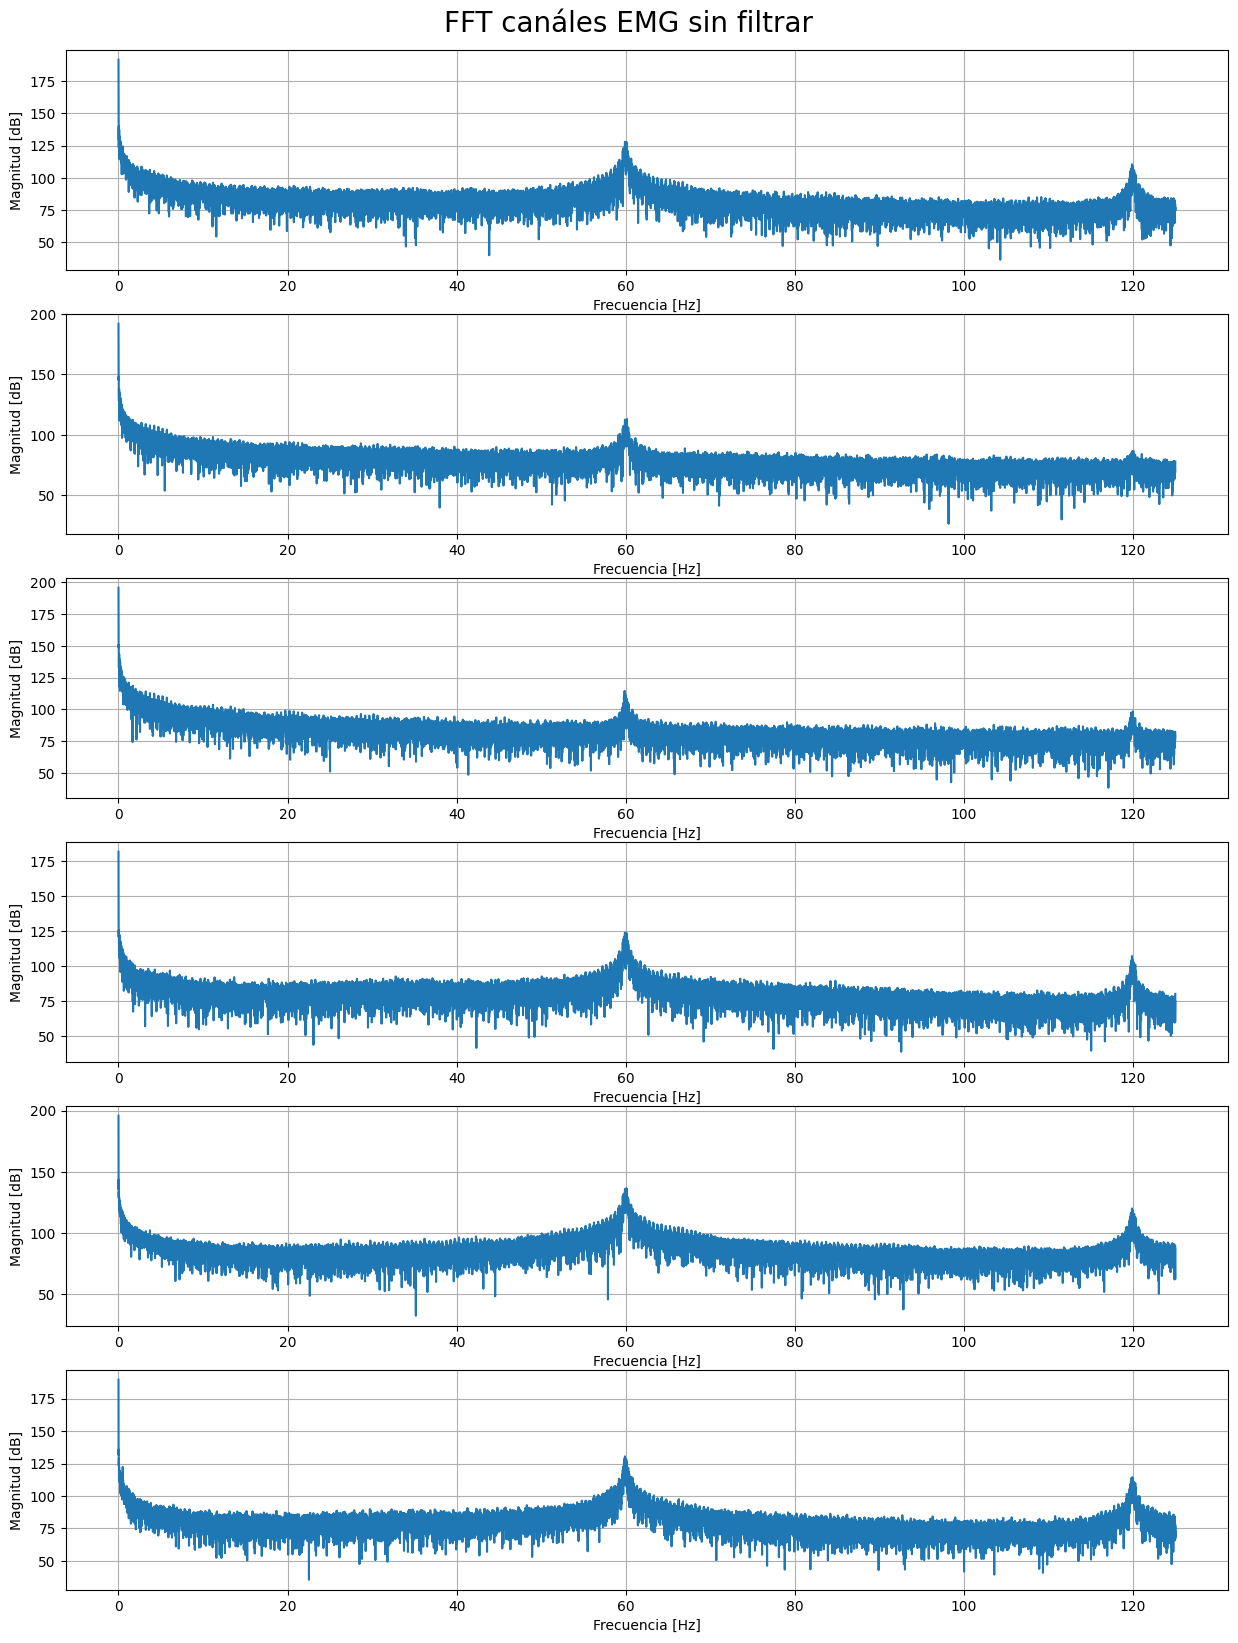

In [18]:
ffts = []
for ch in [ch1, ch2, ch3, ch4, ch5, ch6]:
    h, w = fou(ch, sr)
    ffts.append((w, h))

fig, axes = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle( "FFT canáles EMG sin filtrar", y=0.9, fontsize=20)

for idx, (fft, ax) in enumerate(zip(ffts, axes)):
    ax.plot(fft[0], fft[1])
    ax.set_xlabel('Frecuencia [Hz]')
    ax.set_ylabel('Magnitud [dB]')
    ax.grid()

plt.show()

##### Filtrado de las señales

In [19]:
ch1_filt = emg_filter(ch1)
ch2_filt = emg_filter(ch2)
ch3_filt = emg_filter(ch3)
ch4_filt = emg_filter(ch4)
ch5_filt = emg_filter(ch5)
ch6_filt = emg_filter(ch6)

chs_filt = [ch1_filt, ch2_filt, ch3_filt, ch4_filt, ch5_filt, ch6_filt]


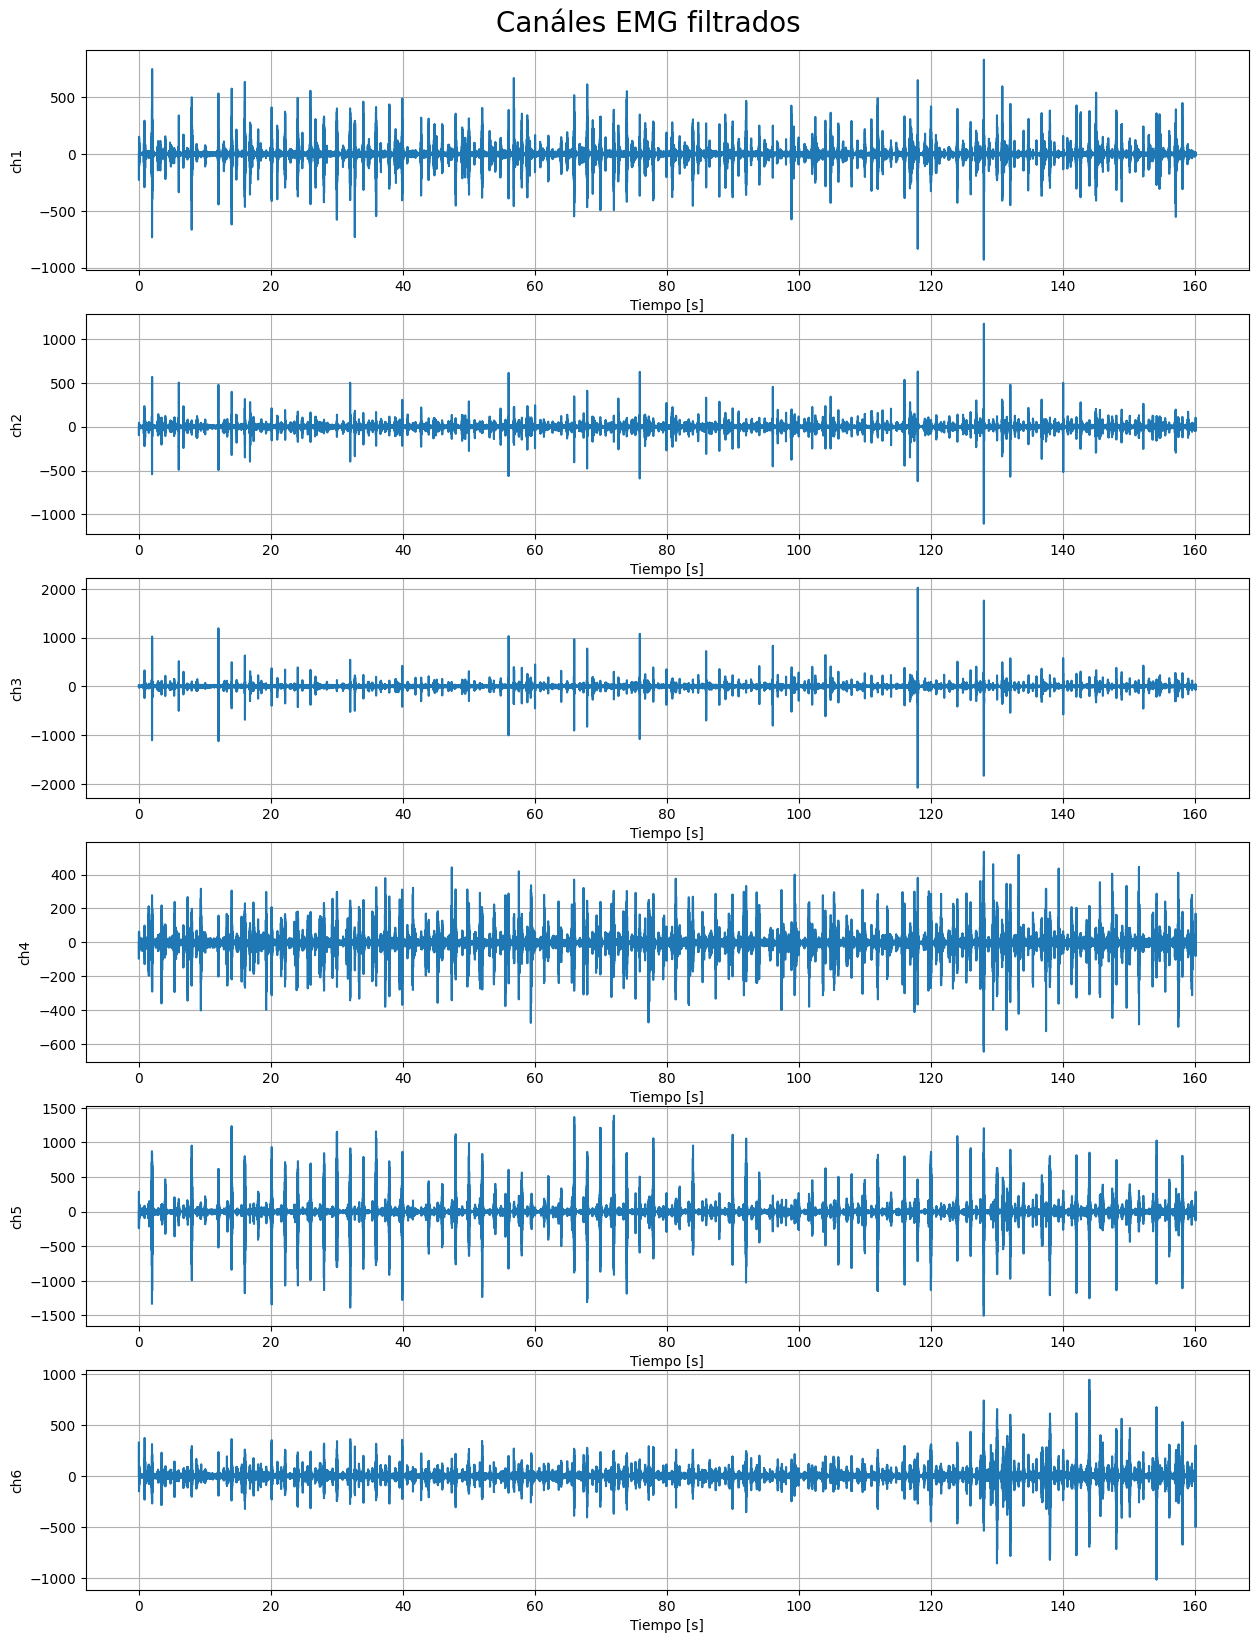

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle("Canáles EMG filtrados", y=0.9, fontsize=20)

for idx, ax in enumerate(axes):
    ax.plot(t, chs_filt[idx])
    ax.set_ylabel(f"ch{idx+1}")
    ax.set_xlabel("Tiempo [s]")
    ax.grid()

plt.show()

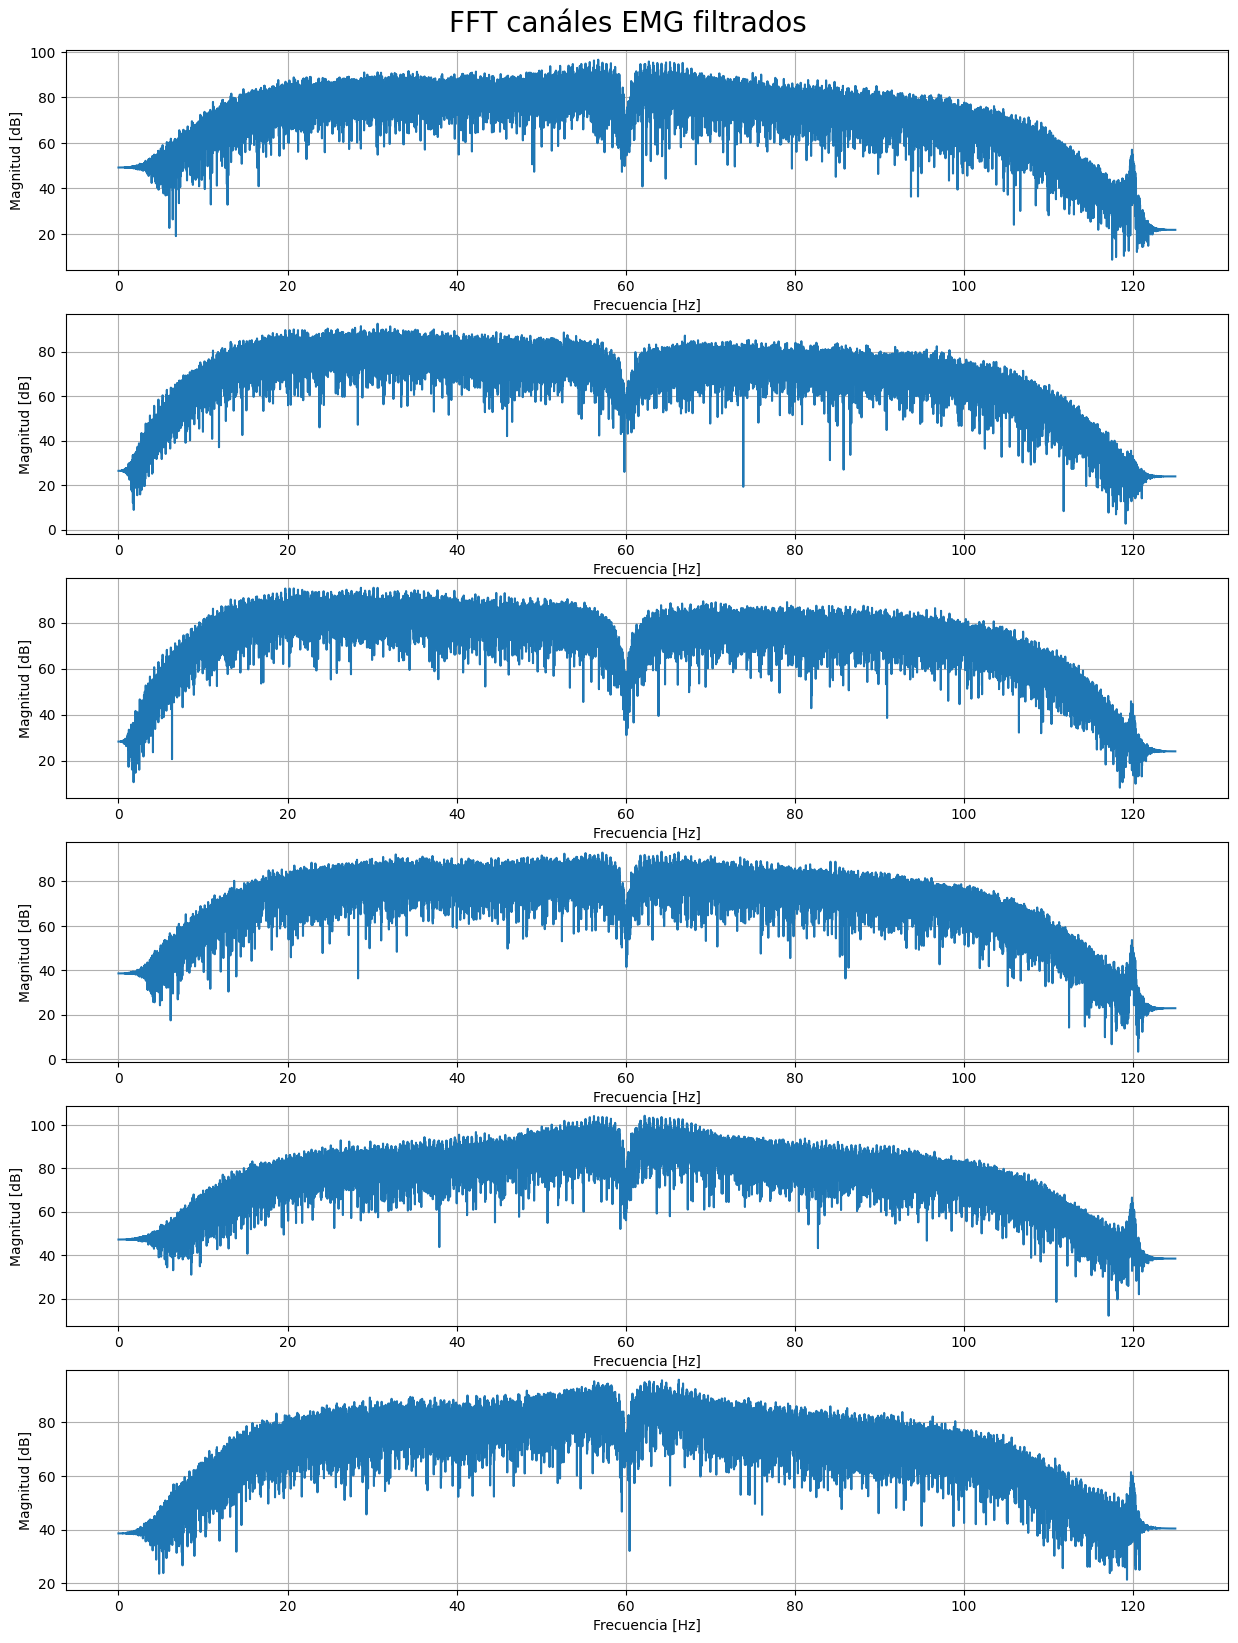

In [21]:
ffts = []
for ch in chs_filt:
    h, w = fou(ch, sr)
    ffts.append((w, h))

fig, axes = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle( "FFT canáles EMG filtrados", y=0.9, fontsize=20)

for idx, (fft, ax) in enumerate(zip(ffts, axes)):
    ax.plot(fft[0], fft[1])
    ax.set_xlabel('Frecuencia [Hz]')
    ax.set_ylabel('Magnitud [dB]')
    ax.grid()

plt.show()

### 5. Exportar resultados

In [22]:
t = np.expand_dims(t, axis=-1)
ch1_filt = np.expand_dims(ch1_filt, axis=-1)
ch2_filt = np.expand_dims(ch2_filt, axis=-1)
ch3_filt = np.expand_dims(ch3_filt, axis=-1)
ch4_filt = np.expand_dims(ch4_filt, axis=-1)
ch5_filt = np.expand_dims(ch5_filt, axis=-1)
ch6_filt = np.expand_dims(ch6_filt, axis=-1)
datos_filt = np.hstack((t, ch1_filt, ch2_filt, ch3_filt, ch4_filt, ch5_filt, ch6_filt))


In [23]:
data_filt = pd.DataFrame(
    datos_filt,
    columns=["time", "ch1", "ch2", "ch3", "ch4", "ch5", "ch6"]
)
data_filt.head()

,time,ch1,ch2,ch3,ch4,ch5,ch6
0,0.000,0.057934,0.005110,0.137318,-0.105023,-0.460652,0.236517
1,0.004,-42.074578,-50.986290,28.061028,-96.427156,-242.252193,205.413249
2,0.008,-227.666641,-96.655085,14.076882,-91.842843,-146.785173,328.505009
3,0.012,-228.743305,-36.261109,-22.283985,54.891560,287.157435,180.457855
4,0.016,80.601198,45.111447,-19.384397,62.465875,136.706666,-152.256841


In [24]:
data_filt.to_csv("../signals/EMG_filt.csv", index=False)